In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0,100,10))

In [4]:
df

,A,B,C,D
0,0.482458,-0.837893,0.801586,-0.230366
10,0.909390,-3.258025,-0.617459,1.789961
20,0.549547,-3.672394,0.422764,2.023580
30,1.165100,-3.028302,-0.961036,3.825397
40,0.476833,-2.068532,-1.400498,4.895414
50,0.109755,-1.790616,-0.744023,7.223210
60,-0.102336,-0.822387,-2.635787,8.216564
70,-0.296802,-0.434512,-1.421567,7.820912
80,-0.230948,0.398216,-2.223052,7.917531
90,0.063663,1.497842,-1.526924,8.777587


<Axes: >

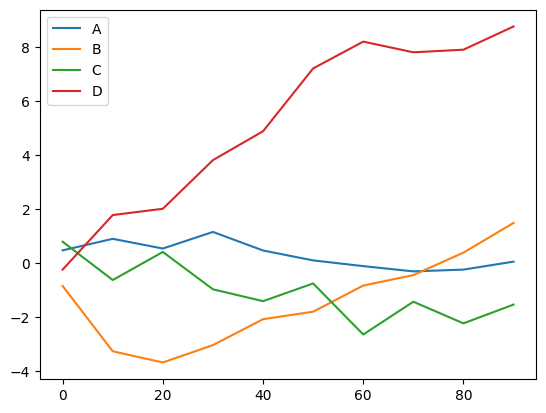

In [5]:
df.plot()

# BarPlot

In [6]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

## bar plot with series

In [7]:
axes = fig.add_subplot()

เป็นการกำหนด 
fig, axes = plt.subplots(2,1 ) ว่ามีการ plot 2 รูป (subplot)  
ตอน plot กำหนดให้เป็น axes[0] หรือว่า axes[1]

<Axes: >

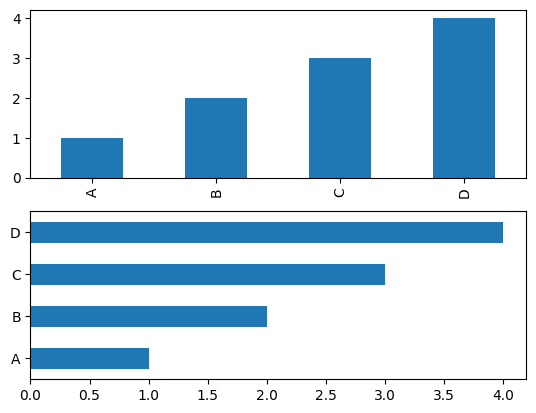

In [8]:
fig, axes = plt.subplots(2,1 )
data = pd.Series(data=[1,2,3,4], index=['A','B','C','D'])
data.plot.bar(ax=axes[0])
data.plot.barh(ax=axes[1])

## bar plot with dataframe

In [9]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                    index=["one", "two", "three", "four", "five", "six"],
                    columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.493789,0.288729,0.334122,0.163161
two,0.692934,0.029892,0.469306,0.599687
three,0.470346,0.381911,0.783958,0.163353
four,0.202890,0.250973,0.205775,0.059788
five,0.000699,0.578821,0.766353,0.034489
six,0.010141,0.036532,0.334985,0.039011


ข้อมูลที่เป็น **index** จะหลายเป็น **แกน x**

<Axes: >

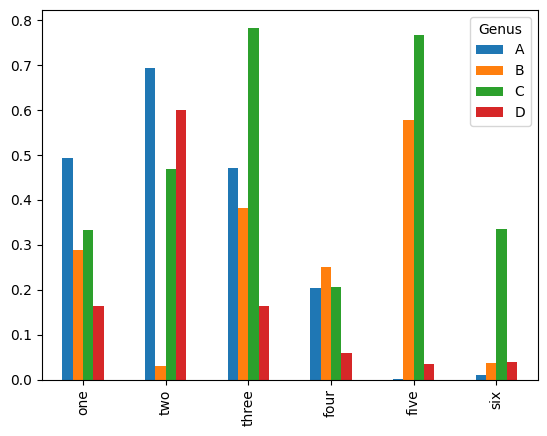

In [10]:
df.plot.bar()

<Axes: >

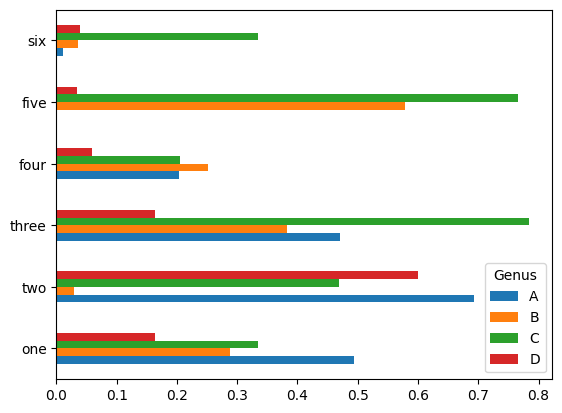

In [11]:
df.plot.barh()

<Axes: >

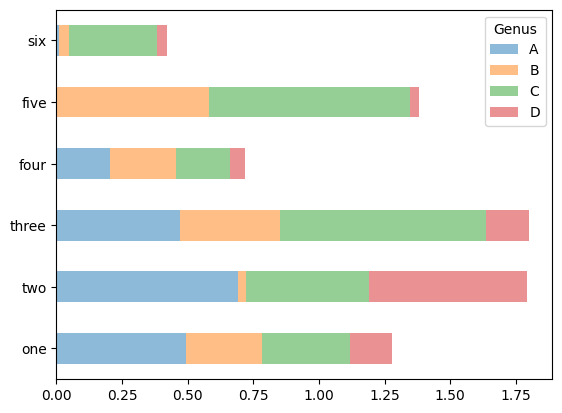

In [12]:
df.plot.barh(stacked=True, alpha=0.5)

ตราวนี้มาลองสร้างแบบทีเดียว

In [13]:
tips = pd.read_csv('tips.csv')
tips.sample(10)

,total_bill,tip,smoker,day,time,size
160,21.50,3.50,No,Sun,Dinner,4
214,28.17,6.50,Yes,Sat,Dinner,3
184,40.55,3.00,Yes,Sun,Dinner,2
166,20.76,2.24,No,Sun,Dinner,2
240,27.18,2.00,Yes,Sat,Dinner,2
69,15.01,2.09,Yes,Sat,Dinner,2
135,8.51,1.25,No,Thur,Lunch,2
28,21.70,4.30,No,Sat,Dinner,2
59,48.27,6.73,No,Sat,Dinner,4
57,26.41,1.50,No,Sat,Dinner,2


In [14]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [15]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


ตอนนี้วันมันยังไม่เรียงกัน ทำการเรียงใหม่โดยใช้ reindex แต่ถ้าจะให้ดีต้องทำเป็น ordered category แต่ต้น

In [16]:
party_counts = party_counts.reindex(index=['Thur','Fri','Sat','Sun'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [17]:
party_counts = party_counts.loc[:, 2:5]

In [18]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),axis="index")

In [19]:
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


In [20]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [21]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


## Histogram and destity

<Axes: ylabel='Frequency'>

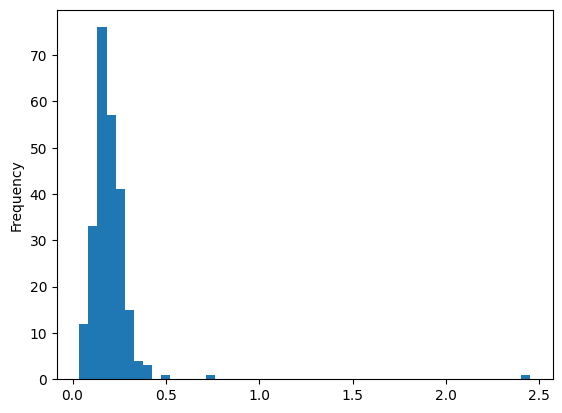

In [22]:
tips['tip_pct'].plot.hist(bins=50)

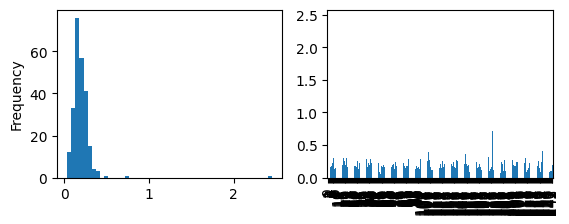

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

tips['tip_pct'].plot.hist(ax= ax1, bins=50);
ax1.set_title = 'Freq'
tips['tip_pct'].plot.bar(ax= ax2);
ax2.set_title = 'Freq'

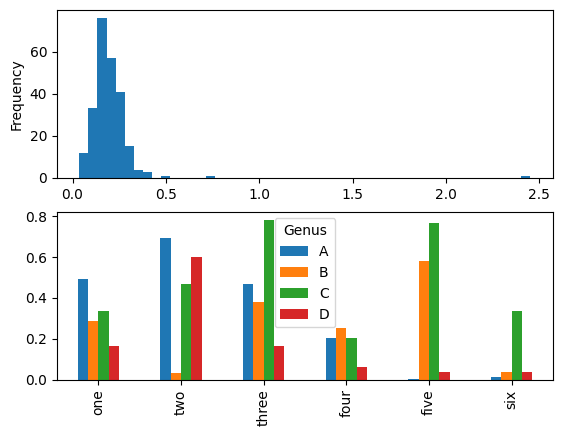

In [24]:
fig, axes= plt.subplots(2,1)
tips['tip_pct'].plot.hist(ax=axes[0], bins=50)
df.plot.bar(ax=axes[1])
axes[1].set_title= 'welcome'

## Ploting with groupby & pivot table

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dfA = pd.DataFrame({'day': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
                   'product': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
                   'sales': [4, 7, 8, 12, 15, 8, 11, 14, 19, 20]})

สร้าง Data Frame ที่ชื่อว่า dfA (dataFrame - Alpha)

In [26]:
dfA

,day,product,sales
0,1,A,4
1,2,A,7
2,3,A,8
3,4,A,12
4,5,A,15
5,1,B,8
6,2,B,11
7,3,B,14
8,4,B,19
9,5,B,20


ทำการกดหนดให้ 'day' เป็น index

In [27]:
dfA.set_index('day', inplace=True)

### ploting multiple line in single plot
ทำการ group โดยใช้ product และนำเอายอดขายมา plot

product
A    Axes(0.125,0.11;0.775x0.77)
B    Axes(0.125,0.11;0.775x0.77)
Name: sales, dtype: object

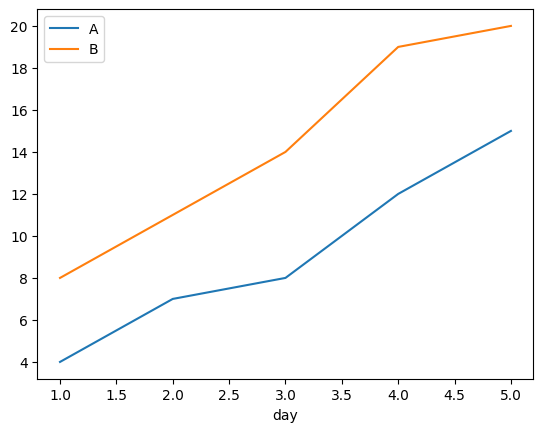

In [28]:
dfA.groupby('product')['sales'].plot(legend=True)

### Individually plot in subplots

array([<Axes: xlabel='day'>, <Axes: xlabel='day'>], dtype=object)

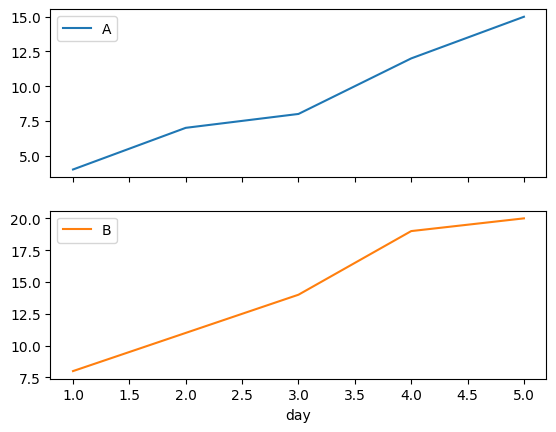

In [31]:
dfA = pd.DataFrame({'day': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
                   'product': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
                   'sales': [4, 7, 8, 12, 15, 8, 11, 14, 19, 20]})
dfA.pivot_table(index='day', columns='product', values='sales').plot(subplots=True)


จะเป็นการ plot แยกกัน แต่เรียง layout ใหม่

array([[<Axes: xlabel='day'>, <Axes: xlabel='day'>]], dtype=object)

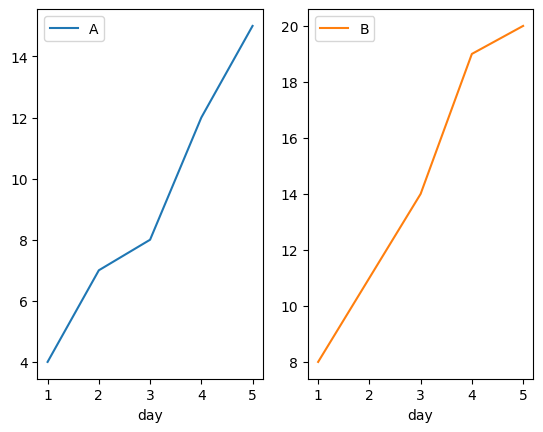

In [34]:
dfA.pivot_table(index='day', columns='product', values='sales').plot(subplots=True, layout= (1,2))

สิ่งที่คำคัญในการเลือกว่าจะ plot แบบกราฟ เดียวๆ หรือว่าจะเป็น subplot ขึ้นอยู่กับการ**ตั้งค่าว่า subplot** = false หรือว่า true

ในแบบเดียวกันลองตั้งค่าเป็น False ดู จะได้แบบรวมกันแทน

<Axes: xlabel='day'>

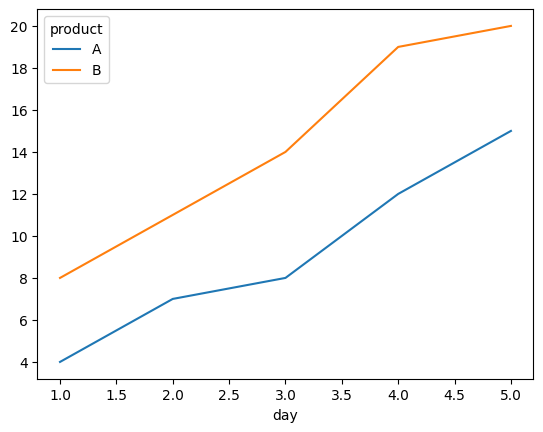

In [33]:
dfA.pivot_table(index='day', columns='product', values='sales').plot(subplots=False)

In [19]:
import pandas as pd 
dfB = pd.read_csv('mpg.csv')

In [20]:
dfB

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [32]:
dfC = dfB.nlargest(100, 'hwy')

In [48]:
pivot = dfC.pivot_table(index= 'class', columns='fl', values='hwy')

In [49]:
pivot

fl,c,d,p,r
class,,,,
2seater,NaN,NaN,26.000000,NaN
compact,NaN,44.0,28.214286,29.318182
midsize,NaN,NaN,27.333333,28.000000
subcompact,36.0,42.5,29.000000,28.850000
suv,NaN,NaN,NaN,26.500000
